In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("lab07.ipynb")

/home/jie.cao/miniconda3/envs/data8-sp24/lib/python3.12/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


<img src="data8logo.png" style="width: 15%; float: right; padding: 1%; margin-right: 2%;"/>

# Lab 7: Great British Bake Off (A/B Test)

Welcome to Data 8 Lab 7! This week's lab will focus on A/B Testing using data from the ever-popular British television show, [*The Great British Bake Off*](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off).

#### **Helpful Resource:**
- [Python Reference](http://data8.org/sp24/reference/)

**Recommended Readings:**

* [Error Probabilities](https://inferentialthinking.com/chapters/11/4/Error_Probabilities.html)
* [A/B Testing](https://inferentialthinking.com/chapters/12/1/AB_Testing.html)

**Getting help on lab**: Whenever you feel stuck or need some further clarification, find a GSI or tutor, and they'll be happy to help!

Here are the policies for getting full credit:

1. For students enrolled in in-person <span style="color: #BC412B">**Regular Labs**</span>, you will receive full lab credit by **attending** lab discussion, making significant progress on the lab notebook, and submitting it to Gradescope by **5pm on the Friday the same week it was released**.

2. For students enrolled in <span style="color: #04888B">**Self Service**</span>, you will receive full lab credit by **completing** the notebook, passing the test cases, and **submitting** it to Gradescope by **5pm on the Friday the same week it was released**.

**Submission**: Once you’re finished, run all cells besides the last one, select File > Save Notebook, and then execute the final cell. The result will contain a zip file that you can use to submit on Gradescope.

Let's begin by setting up the tests and imports by running the cell below.

In [3]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', (FutureWarning, np.VisibleDeprecationWarning))


## 0. Mid-Semester Survey

We would like you to fill out the mid-semester survey before proceeding any further in this assignment.

Please fill out the survey below and input the secret phrase that is shown at the end of the form when you submit. Please assign this phrase to `mid_secret` as a string in the cell below!

Find the survey [here](https://forms.gle/Bd9TszXzGeeg5xsY9)

In [4]:
# mid_secret = ...

In [5]:
# grader.check("q0")

## 1. A/B Testing

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions. We may also refer to an A/B test as a permutation test.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step. Oftentimes, we use an A/B test to determine whether or not two samples came from the same underlying distribution.

**Question 1.1.** The following statements are the steps of an A/B hypothesis test presented in a *random order*:

1. Choose a test statistic (typically the difference in means between two categories)

2. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times

3. Find the value of the observed test statistic

4. Calculate the p-value based off your observed and simulated test statistics

5. Define a null and alternate model

6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis

Assign `ab_test_order` to an array of integers that contains the correct order of an A/B test, where the first item of the array is the first step of an A/B test and the last item of the array is the last step of an A/B test.


In [6]:
ab_test_order = make_array(5, 1, 3, 2, 4, 6)
# 正确顺序:
# 1. 定义一个零假设和一个备择假设
# 2. 选择一个检验统计量（通常是两个类别之间的平均值差异）
# 3. 求出观察到的检验统计量的值
# 4. 打乱原始样本的标签，求出模拟的检验统计量，并重复多次
# 5. 根据你观察到的和模拟的检验统计量计算 p 值
# 6. 使用p值和p值截断值来对零假设作出结论

In [7]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** If the null hypothesis of an A/B test is correct, should the order of labels affect the differences in means between each group? Why do we shuffle labels in an A/B test? If you are in a lab section, confirm your answer with a neighbor or staff member before moving on. 


<!-- _Type your answer here, replacing this text._ -->
**Answer 1.2.** The order shouldn't affect the differences in means between each group. We shuffle labels to create a reference distribution so that we can assess how likely it is to observe our statistic if the null hypothesis were true.

**GPT 4 回答：**

如果A/B测试的零假设是正确的，那么标签的顺序不应该影响每个组之间的平均值差异。零假设通常声称两个群体之间没有显著差异，或者说任何观察到的差异仅仅是由随机变化造成的。因此，在这个假设下，无论如何重新分配这些标签（即使随机地），它们都不应该系统性地改变两个群体的平均值差异，因为这些差异“不存在”。

我们在A/B测试中打乱标签的原因是为了创建一个参考分布，这样我们就可以评估在零假设为真的情况下，观察到的统计量（例如，两组平均值的差异）出现的可能性有多大。通过重复随机分配标签并计算每次分配后的测试统计量（比如，平均值的差异），我们可以构建一个分布模型，显示在没有实际效果（即，假设零假设为真）的情况下，结果可能会有多么极端。然后，我们可以将实际观察到的统计量与这个分布进行比较，以确定其是否异常。如果我们的观察统计量在这个分布中非常罕见（也就是说，如果计算出来的 p 值低于预先设定的临界值），那么我们有理由拒绝零假设，支持备择假设，这表明两个群体之间确实存在显著差异。

## 2. The Great British Bake Off

>"The Great British Bake Off (often abbreviated to Bake Off or GBBO) is a British television baking competition, produced by Love Productions, in which a group of amateur bakers compete against each other in a series of rounds, attempting to impress a group of judges with their baking skills" [Wikipedia](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off)

For every week of the competition, the judges assign one contestant the title "Star Baker". Ultimately, one winner is crowned every season. Using this information, we would like to investigate how winning Star Baker awards affects the odds of winning a season of the show.

**Question 2.1.** We want to know whether winning more Star Baker awards ___causes___ a change in likelihood of winning the season.  Why is it not sufficient to compare star baker rates for winners and losers?


<!-- _Type your answer here, replacing this text._ -->
**Answer 2.1.** Here are some possible reasons:

1. **Correlation does not imply causation**: Just because winners tend to have won more Star Baker awards does not mean that winning these awards causes contestants to win the season. It's possible that both are effects of underlying factors such as skill level, creativity, or experience in baking.

2. **Selection Bias**: Contestants who win Star Baker awards might be inherently more skilled or talented at baking compared to those who do not win any awards. Thus, their higher skill level, rather than the act of winning the award itself, could be what increases their odds of winning the season.

3. **Confounding Variables**: There may be other variables that affect both the likelihood of winning Star Baker awards and the ultimate outcome of winning the season. For example, a contestant's ability to perform under pressure, their versatility with different types of bakes, or even their personal story and how it resonates with judges and viewers might influence both outcomes.

4. **Reverse Causality**: While it's hypothesized that winning Star Baker awards affects the odds of winning the season, it could also be that contestants who are already likely to win the season due to their superior skills and consistency are more likely to win Star Baker awards throughout the competition. This makes it a challenge to determine the direction of causality.

### Running an Experiment

We are going to run the following hypothesis test to determine the association between winning and number of Star Baker awards. The population we are examining is every contestant from seasons 2 through 11 of GBBO. We are going to use the following null and alternative hypotheses:

**Null hypothesis:** The distribution of Star Baker awards between contestants who won their season and contestants who did not win their season is the same.

**Alternative hypothesis:** Contestants who win their season of the show will win more Star Baker awards on average.

Our alternative hypothesis is related to our suspicion that contestants who win more Star Baker awards are more skilled, so they are more likely to win the season.

**Question 2.2.** Should we use an A/B test to test these hypotheses? If yes, what is our "A" group and what is our "B" group?


<!-- _Type your answer here, replacing this text._ -->
**Answer 2.1.** 

Yes, an A/B test would be appropriate to test these hypotheses because we are comparing two distinct groups to evaluate the effect of winning Star Baker awards on the likelihood of winning the season. In this context, our "A" group and "B" group are defined as follows:

- **"A" group (Treatment group):** Contestants who won their season. This group represents individuals for whom we want to assess the impact of winning more Star Baker awards in relation to winning the season.

- **"B" group (Control group):** Contestants who did not win their season. These are contestants that serve as a comparison to understand if there's a significant difference in the number of Star Baker awards won between those who win the season and those who do not.

By using an A/B test with these groups, we can statistically analyze whether there's a significant difference in the distribution of Star Baker awards between winners and non-winners, which would help us address our hypothesis about the association between winning Star Baker awards and the overall chance of winning the season.

Check your answers with your neighbors or a staff member before you move on to the next section.

The `bakers` table below describes the number of star baker awards each contest won and whether or not they won their season (`1` if they won, `0` if they did not win). The data was manually aggregated from Wikipedia for seasons 2-11 of the show. We randomized the order of rows as to not spoil the outcome of the show.

In [8]:
bakers = Table.read_table("star_bakers.csv")
bakers.show(3)

star baker awards,won
3,1
0,0
1,0


**Question 2.3.** Create a new table called `means` that contains the mean number of star baker awards for bakers who did not win (`won==0`) and bakers that did win (`won==1`). The table should have the column names `won` and `star baker awards mean`.

In [9]:
means = bakers.group('won', np.mean)
means

won,star baker awards mean
0,0.651786
1,1.5


In [10]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 2.4.** Visualize the distribution of Star Baker awards for winners and non-winners as overlaid histograms. You should use the bins we provided.

Hint: You will want to use the group argument of `tbl.hist`. In order to produce several overlayed histograms based on unique values in a given column, we can do something like `tbl.hist(..., group=<col_name>, bins=...)`. This will graph one histogram for each unique value in the specified column all on a single plot.


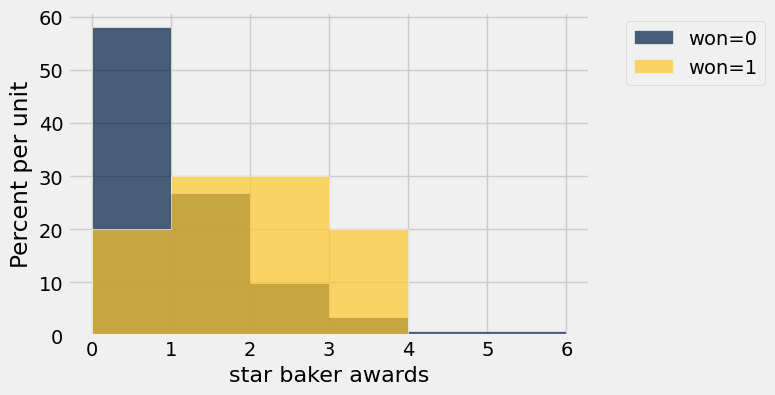

In [11]:
useful_bins = np.arange(0, 7)
bakers.hist('star baker awards', overlay=True, bins=useful_bins, group='won')

**Question 2.5.** We want to figure out if there is a difference between the distribution of Star Baker awards between winners and non winners. 

What should the test statistic be? Which values of this test statistic support the null, and which values support the alternative? **Assign `test_option` to the number corresponding to the correct test statistic.**

1. Absolute value of the difference between the means between both groups; high values support the null
2. Absolute value of the difference between the means between both groups; low values support the null
3. Average Star Baker awards for winners - average Star Baker awards for non-winners; high values support the null
4. Average Star Baker awards for winners - average Star Baker awards for non-winners; low values support the null

Before moving on, confirm your answer with a peer or in the discussion forums.

_Hint:_ You should think about what measures we use to describe a distribution. 


In [12]:
test_option = 4

# 检验统计量：赢家的平均获奖数 - 非赢家的平均获奖数

In [13]:
grader.check("q2_5")

q2_5 results: All test cases passed!

**Question 2.6.** Set `observed_difference` to the observed test statistic using the `means` table. 


In [14]:
observed_difference = means.column('star baker awards mean').item(1) - means.column('star baker awards mean').item(0)
observed_difference

0.8482142857142857

In [15]:
grader.check("q2_6")

q2_6 results: All test cases passed!

**Question 2.7.** Given a table like `bakers`, a label column `label_col`, and a values column `val_col`, write a function that calculates the appropriate test statistic.

*Hint:* Make sure that you are taking the directionality of our alternative hypothesis into account.


In [16]:
def find_test_stat(tbl, label_col, val_col):
    means = tbl.group(label_col, np.mean)
    val_col_mean = val_col + ' mean'
    return means.column(val_col_mean).item(1) - means.column(val_col_mean).item(0)


find_test_stat(bakers, "won", "star baker awards")

0.8482142857142857

In [17]:
grader.check("q2_7")

q2_7 results: All test cases passed!

When we run a simulation for A/B testing, we resample by **shuffling the labels** of the original sample. If the null hypothesis is true and the star baker award distributions are the same, we expect that the difference in mean star baker awards to not change when `"won"` labels are changed.

**Question 2.8.** Write a function `simulate_and_test_statistic` to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.


In [34]:
def simulate_and_test_statistic(tbl, labels_col, values_col):
    shuffled_labels = tbl.sample(with_replacement=False).column(labels_col)
    shuffled_labels_col = 'shuffled'
    shuffled_tbl = Table().with_column(values_col, tbl.column(values_col)).with_column(shuffled_labels_col, shuffled_labels)
    return find_test_stat(shuffled_tbl, shuffled_labels_col, values_col)

simulate_and_test_statistic(bakers, "won", "star baker awards")

0.08571428571428574

In [35]:
grader.check("q2_8")

q2_8 results: All test cases passed!

**Question 2.9.** Simulate 5000 trials of our A/B test and store the test statistics in an array called `differences`.


In [43]:
# This cell might take a couple seconds to run
differences = make_array()

for _ in range(5000):
    differences = np.append(differences, simulate_and_test_statistic(bakers, "won", "star baker awards"))
                                                 
differences

array([ 0.08571429,  0.63035714, -0.13214286, ..., -0.24107143,
       -0.02321429, -0.45892857])

In [44]:
grader.check("q2_9")

q2_9 results: All test cases passed!

Run the cell below to view a histogram of your simulated test statistics plotted with your observed test statistic.

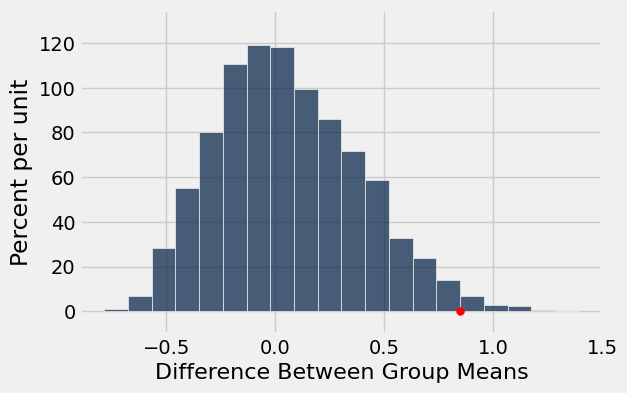

In [45]:
Table().with_column('Difference Between Group Means', differences).hist(bins=20)
plots.scatter(observed_difference, 0, color='red', s=30, zorder=2)
plots.ylim(-0.1, 1.35);

**Question 2.10.** Find the p-value for your test and assign it to `empirical_p`.


In [46]:
empirical_p = np.count_nonzero(differences >= observed_difference) / 5000
empirical_p

0.0136

In [47]:
grader.check("q2_10")

q2_10 results: All test cases passed!

**Question 2.11.** Using a 5% P-value cutoff, draw a conclusion about the null and alternative hypotheses. Describe your findings using simple, non-technical language. What does your analysis tell you about the association between star baker awards and winning? What can you claim about causation from your statistical analysis? Confirm your answer with a peer, instructor or in the discussion forums. 


<!-- _Type your answer here, replacing this text._ -->
**Answer 2.11.** 

Since the `empirical_p` is 0.0135, which is smaller than 5%, the null hypothesis is rejected. 

The analysis does not imply causal relationship between the number of award a contestant receives and whether he/she wins the season, it only says that the null hypothesis is bad without reason (in other words, the observed difference is caused by something other than chance).

## All done!

**Oreo** hopes you are having an AMAZING week and congratulates you on finishing Lab 07!

<img src="oreo.jpeg" alt="picture of a black and white fluffy dog with festive garments" width="300"/>



---

You're done with lab!

**Important submission information:**
- **Run all the tests** and verify that they all pass
- **Save** from the **File** menu
- **Run the final cell to generate the zip file**
- **Click the link to download the zip file**
- Then, go to [Gradescope](https://www.gradescope.com/courses/703847) and submit the zip file to the corresponding assignment. The name of this assignment is "Lab XX Autograder", where XX is the lab number -- 01, 02, 03, etc.

- If you finish early in Regular Lab, **ask one of the staff members to check you off**.

**It is your responsibility to make sure your work is saved before running the last cell.**


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)